In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


Generate Descriptive Statistics and Visualizations




For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

    .For the "Median value of owner-occupied homes" provide a boxplot

   . Provide a bar plot for the Charles river variable

    .Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

    .Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

    .Create a histogram for the pupil to teacher ratio variable


# Boxplot for the "Meadian value of owner-occupied homes"

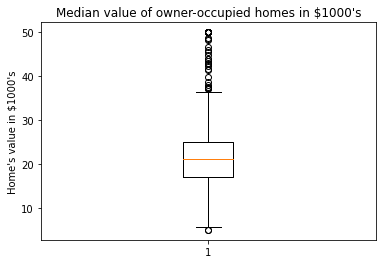

In [4]:


# create plot
plt.boxplot(boston_df['MEDV'])
# add title
plt.title("Median value of owner-occupied homes in $1000's")
# add y label
plt.ylabel("Home's value in $1000's")
# display plot
plt.show()



Findings: The box plot of the meadian value of owner-occupied homes provides a quick visual summary of the variability of values in the dataset. Note that there are a significant number of outliers after the third quartile.

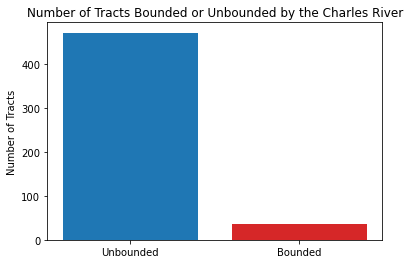

In [5]:
# get hieght of bars for if the tract bounds river or not
# tract bounds river
bounded = boston_df[boston_df['CHAS'] == 1]
bounded_count = (bounded['CHAS'].count())
# tract does not bound river
unbounded = boston_df[boston_df['CHAS'] == 0]
unbounded_count = (unbounded['CHAS'].count())
# create plot
plt.bar(['Unbounded','Bounded'],[unbounded_count,bounded_count],color=['tab:blue','tab:red'])
# add title
plt.title("Number of Tracts Bounded or Unbounded by the Charles River")
# add y label
plt.ylabel("Number of Tracts")
# display plot
plt.show()

Findings: The majority of the tracts do not bound the Charles river.

# Boxplot of Median value of owner-occupied homes vs Age

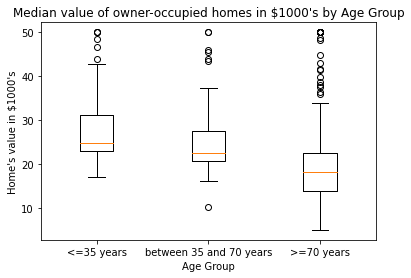

In [6]:
# Group MEDV by AGE
group_labels = ['<=35 years','between 35 and 70 years','>=70 years']
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

# create plot
plt.boxplot([boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
             boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
             boston_df[boston_df['age_group'] == '70 years and older']['MEDV']],
            labels = group_labels)
# add title
plt.title("Median value of owner-occupied homes in $1000's by Age Group")
# add y label
plt.ylabel("Home's value in $1000's")
# add x label
plt.xlabel("Age Group")
# display plot
plt.show()



Findings: The median of the Median value of owner-occupied homes decreases with increase in age.

## Scatter Plot to show the relationship between Nitric oxide concertrations and the proprtion of non-retail business acres per town

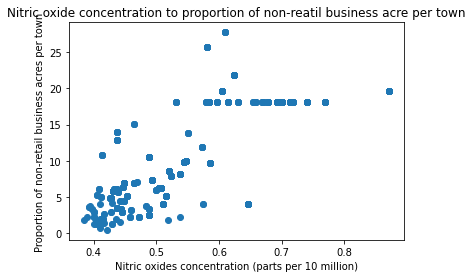

In [7]:
# create plot
plt.scatter(boston_df['NOX'],boston_df['INDUS'])
# add title
plt.title("Nitric oxide concentration to proportion of non-reatil business acre per town")
# add y label
plt.ylabel("Proportion of non-retail business acres per town")
# add x label
plt.xlabel("Nitric oxides concentration (parts per 10 million)")
# display plot
plt.show()

Findings: The smaller the proportion of non-retail business acres per town the smaller the nitric oxide concentration. In other words, It appears that nitric oxide concentration generally increases with increasing proportion of non-retail businesses acres per town. Additionally, there appears to be an interesting phenomina at roughly 18 non-retail business acres per town. Possible Boston area regulation that limits the proportion of non-retail business acres.

# Histogram of the pupil to teacher ratio variable

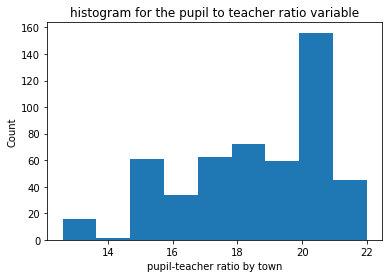

In [8]:


# Sturge’s rule to determine number of bins
bins = 1 + int(math.log2((boston_df['PTRATIO'].count())))

# create plot
plt.hist(boston_df['PTRATIO'],
        bins=bins,)
# add title
plt.title("histogram for the pupil to teacher ratio variable")
# add y label
plt.ylabel("Count")
# add x label
plt.xlabel("pupil-teacher ratio by town")
# display plot
plt.show()



Findings: The pupil-teacher ratio by town does not follow a normal distribution. Rather the distribution of pupil-teacher ratio by town is skewed left.

# Use the appropriate tests to answer the questions provided.

For each of the following questions;

    Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

    Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

    Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

    What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

    State your hypothesis.

    Use α = 0.05

    Perform the test Statistics.

    State the conclusion from the test.



Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

[Math Processing Error]
("there is no difference in median value of houses bounded by the Charles river or not")
[Math Processing Error]

    ("there is a difference in median value of houses bounded by the Charles river or not")

Test for equality of variance


In [10]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can not assume equality of variance

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that there is a difference in median value of houses bounded by the Charles river or not

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)



State the hypothesis

    [Math Processing Error]

("there is no difference in median value of houses for each proportion of owner occupied units built prior to 1940")
[Math Processing Error]
At least one of the means differ ("there is a difference in median value of houses for each proportion of owner occupied units built prior to 1940")

In [12]:
# Group MEDV by AGE
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [13]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                   center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

Now, run a one-way ANOVA.

In [14]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that there is a difference in median value of houses for each proportion of owner occupied units built prior to 1940

an we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

    [Math Processing Error]

Nitric oxide concentration is not correlated with the proportion of non-retail business arces per town
[Math Processing Error]
Nitric oxide concentration is correlated with the proportion of non-retail business arces per town

In [16]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

Conclusion: Since the p-value < 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

## State the hypothesis:

    [Math Processing Error]

Weighted distance to the five Boston employment centres are not related to the median value of the owner occupied homes
[Math Processing Error]
Weighted distance to the five Boston employment centres are related to the median value of the owner occupied homes

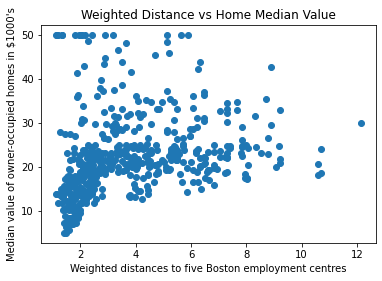

In [17]:
# create plot
plt.scatter(boston_df['DIS'],boston_df['MEDV'])
# add title
plt.title("Weighted Distance vs Home Median Value")
# add y label
plt.ylabel("Median value of owner-occupied homes in $1000's")
# add x label
plt.xlabel("Weighted distances to five Boston employment centres")
# display plot
plt.show()

In [18]:
X = boston_df['DIS']
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\Brookovic\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        15:12:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: Since the p-value < 0.05, we reject the null hypothesis and conclude that there exists a relationship between the distance to the five Boston employment centres and the median value of the owner-occupied homes. The correlation coefficient of roughly 0.25 indicates theres a weak positive correlation between the two variables. The coef of DIS of 1.0916 indicates that the impact of 1 unit increase in the weighted distance to the five Botson employment centres increases the median value of the owner-occupied homes by 1.0916. In other words, the higher the weighted distances to the five Botson employment centres the higher the median value of owner-occupied homes.
